In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv('data\\data_science_salaries.csv')
df.sample(12)

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
6035,Data Scientist,Mid-level,Freelance,Remote,2022,Canada,100000,USD,100000,United States,Medium
3922,Data Engineer,Senior-level,Full-time,On-site,2023,United States,221484,USD,221484,United States,Medium
3977,Computer Vision Engineer,Senior-level,Full-time,On-site,2023,United States,170000,USD,170000,United States,Medium
5368,Data Scientist,Senior-level,Full-time,Remote,2022,United States,173000,USD,173000,United States,Medium
2573,Data Scientist,Senior-level,Full-time,On-site,2023,United States,159000,USD,159000,United States,Medium
4819,Data Operations Analyst,Senior-level,Full-time,On-site,2023,United Kingdom,77000,USD,77000,United Kingdom,Medium
4428,ML Engineer,Senior-level,Full-time,On-site,2023,United States,289076,USD,289076,United States,Medium
4341,Data Scientist,Senior-level,Full-time,On-site,2023,United States,183000,USD,183000,United States,Medium
5708,Data Operations Engineer,Mid-level,Full-time,Remote,2022,United States,100000,USD,100000,United States,Medium
3132,Data Engineer,Senior-level,Full-time,On-site,2023,United States,91270,USD,91270,United States,Medium


We have imported the data and made a quick overview just to get an introduction to our dataframe.
Next we should prepare the data and clean things up a little.

In [4]:
df.isnull().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [5]:
df.isna().sum()

job_title             0
experience_level      0
employment_type       0
work_models           0
work_year             0
employee_residence    0
salary                0
salary_currency       0
salary_in_usd         0
company_location      0
company_size          0
dtype: int64

In [6]:
df.shape

(6599, 11)

In [7]:
df.dtypes

job_title             object
experience_level      object
employment_type       object
work_models           object
work_year              int64
employee_residence    object
salary                 int64
salary_currency       object
salary_in_usd          int64
company_location      object
company_size          object
dtype: object

So we can see that the data has no gaps (allegedly) and that we have strings and integers to work with in terms of datatypes.
Let us look at workyear to see what sort of time-frame we have (the range)

In [8]:
min_work_year = df['work_year'].min()
max_work_year = df['work_year'].max()

print(f"The range of work years is from {min_work_year} to {max_work_year}.")


The range of work years is from 2020 to 2024.


And so we can see that we have a range of 2020-2024 (4 years) and that the format is a simple integer. 
As of right now this timeframe is not really anything special as there is too little time to derive any meaningful statistics, but perhaps it is too early to rule out potential in the data.

In [9]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

We can see that the data is already fairly standardized, but let us cast them to using "x-y" instead of "x_y"

In [10]:
import gc

dfStan = df.copy()


dfStan.columns = [col.upper().replace('_', '-') for col in dfStan.columns]

print(dfStan.columns)

# This is simply to demonstrate the possibility
# let us now dump this newlycreated dataframe, as having underscores and lowercase looks better.

del dfStan

gc.collect()

Index(['JOB-TITLE', 'EXPERIENCE-LEVEL', 'EMPLOYMENT-TYPE', 'WORK-MODELS',
       'WORK-YEAR', 'EMPLOYEE-RESIDENCE', 'SALARY', 'SALARY-CURRENCY',
       'SALARY-IN-USD', 'COMPANY-LOCATION', 'COMPANY-SIZE'],
      dtype='object')


0

<h2> Exploring the data</h2>

In [11]:
df.describe() # måske fjern ?

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


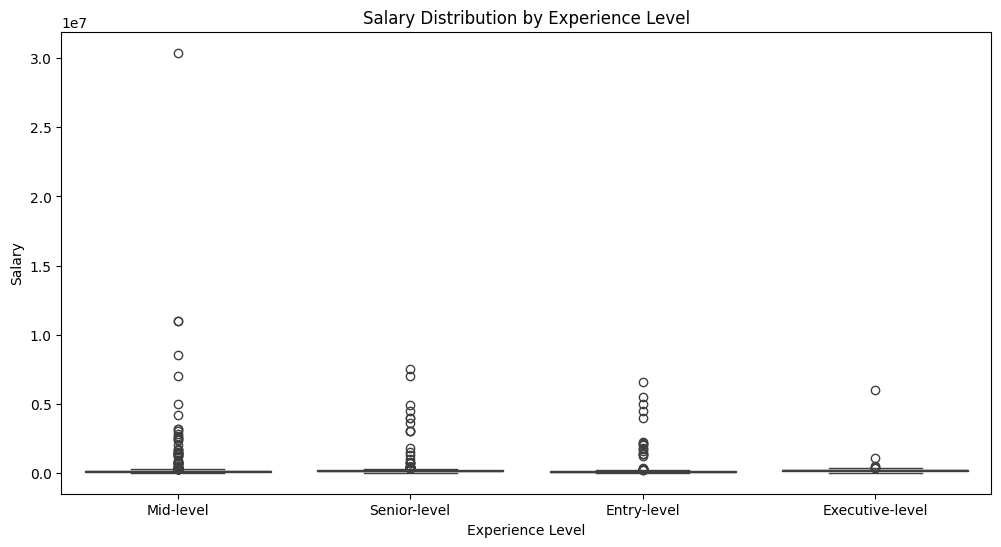

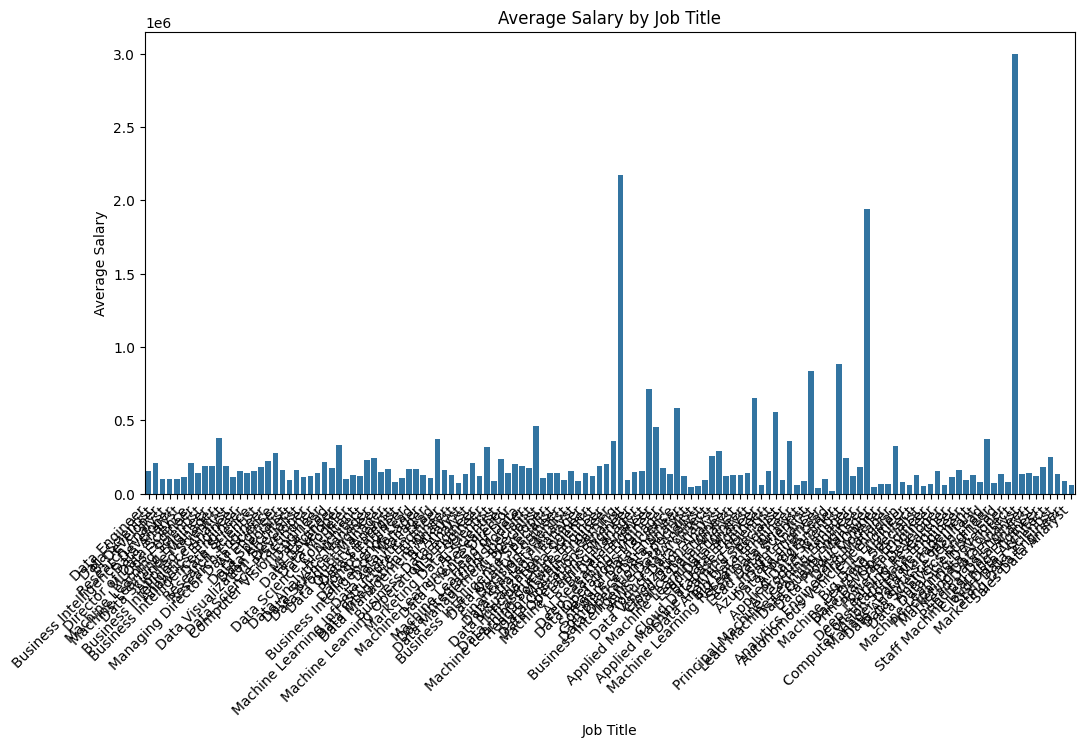

In [12]:

# Box Plot for Salary vs. Experience Level
plt.figure(figsize=(12, 6))
sns.boxplot(x='experience_level', y='salary', data=df)
plt.title('Salary Distribution by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

# Bar Plot for Average Salary by Job Title
plt.figure(figsize=(12, 6))
sns.barplot(x='job_title', y='salary', data=df, errorbar=None)
plt.title('Average Salary by Job Title')
plt.xlabel('Job Title')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right', ) 
plt.show()


In [13]:
# En smule fucked up med x aksen, men måske det tyder på vi kunne lave nogle clusters/grupperinger af titler xd